# HW02- Visualize Real Estate Data

**Importing Libraries**
Below are the libararies that we will be using in this assignment.Namely,
- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations in Python.
- `seaborn`: For statistical data visualization.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#style options
%matplotlib inline
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when
pd.set_option('display.max_rows',15) #allows for up to 500 rows to be displayed when
#if you want graphs to automatically without plt.show
#plt.style.use('seaborn') # using seaborn style is creating some problems so used ggplot
plt.style.use('ggplot') # using ggplot style 

**Importing Dataset**
Now, we will import the dataset using `pandas`. The dataset is a CSV file containing real estate data, which includes various features such as price, area, number of rooms, and more.


In [5]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 2.csv')


## Create Groupby DataFrames and Barplot
### Section 5a: Create the df_results dataframe
In this section, we will create a new DataFrame called `df_results` by grouping the `Dwelling` and showin the mean of `Sale Price` and short them from higest to Lowest.


In [14]:
df_result = df_realestate.groupby('Dwelling Type').agg({'Sale Price': ['mean']}).reset_index()
df_result.columns = ['Dwelling Type', 'Sale Price']  # Flatten multi-level columns
df_result = df_result.sort_values(by='Sale Price', ascending=False)
print(df_result)

           Dwelling Type     Sale Price
7   2-STORY 1946 & NEWER  232236.602740
3            1-STORY PUD  200779.080460
5   2-1/2 STORY ALL AGES  196633.333333
2   1-STORY 1946 & NEWER  183983.785579
11  SPLIT OR MULTI-LEVEL  169775.789474
6   2-STORY 1945 & OLDER  165833.896552
10           SPLIT FOYER  147810.000000
0   1-1/2 STORY ALL AGES  145642.956522
8            2-STORY PUD  138647.380952
9                 DUPLEX  134271.272727
4    2 FAMILY CONVERSION  129755.555556
1   1-STORY 1945 & OLDER   98415.338710


Looking at the above table, we can see that the 2-StORY 1946 & NEWER has the highest average sale price and the 1-STORY 1946 & NEWER has the lowest average sale price. Even if we can look at the shorted table above to see which one is on top and which one is on the bottom, best way to understand the data is to visualize it using a bar plot which is more intuitive and easier to interpret to non-technical audiences.This is what we will do in the next section.

### Section 5b: Create a barplot based on the Dwelling Type

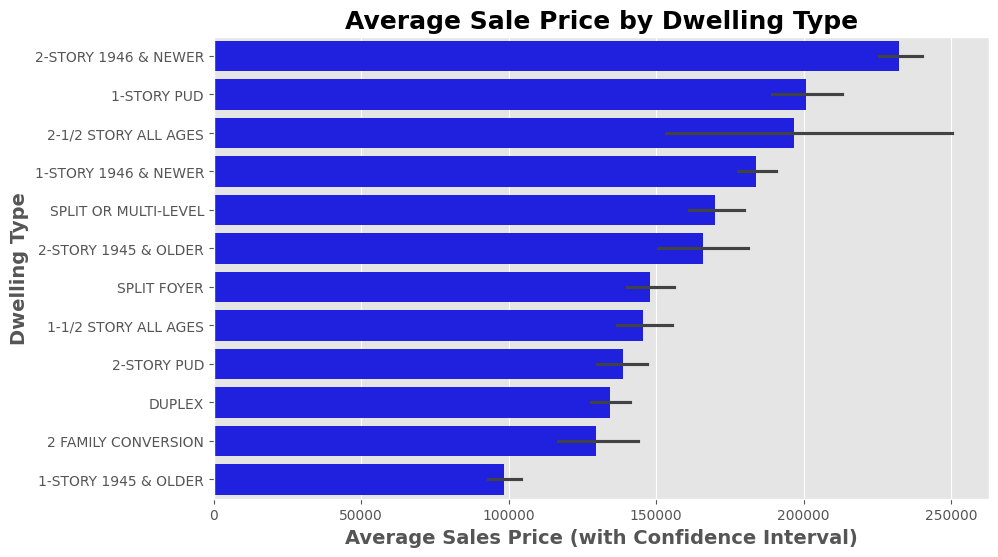

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Sale Price", y="Dwelling Type", data=df_realestate, order=df_result['Dwelling Type'], color='b')
plt.title('Average Sale Price by Dwelling Type', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Average Sales Price (with Confidence Interval)', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Dwelling Type', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.show()

The barplot shows the average sale price for each dwelling type, sorted from highest to lowest. This visualization makes it easier to compare the average prices across different dwelling types.